오늘은 "비즈니스 데이터마이닝" 수업을 들을 때 과제로 제출했던 코드를 조금 다듬어서 정리해보도록 하겠습니다. 과거에 작성했던 파일이기에 설명이나 논리가 부족할 수 있습니다.

In [357]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

# 1. 데이터 불러오기

In [327]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


데이터는 캐글에 있는 [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)을 사용하였습니다. 신용카드 데이터에서 부정 거래를 탐지하는 것이 이번 프로젝트의 목표입니다.

#### 변수 설명

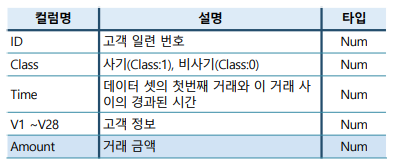

# 2. 데이터 구조 파악

In [328]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 3. 데이터 탐색

## 3.1. Class - 타겟변수

부정 거래의 비율 : 0.17%(492건)


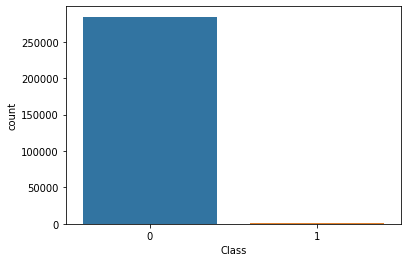

In [330]:
num_1 = len(df[df['Class']==1])
ratio_1 = num_1 / len(df) * 100
print(f'부정 거래의 비율 : {ratio_1:.2f}%({num_1}건)')

sns.countplot(x='Class', data=df);

전체 거래 중 부정 거래의 비율이 0.17%로 범주가 불균형하게 분포하고 있음을 확인할 수 있습니다. 이렇게 Imbalanced Data인 경우에는 모델링 과정에서 소수 범주가 무시되는 문제가 발생할 수 있습니다. 따라서 학습 과정에서 오버샘플링을 실시할 계획입니다. 또한 하나의 범주에 데이터가 집중되어있는 경우에는 평가 지표를 사용할 때에도 유의해야합니다. 평가 과정에서는 Accuracy가 아닌 F1 Score를 이용하여 모델을 평가하도록 하겠습니다.

## 3.2. Time

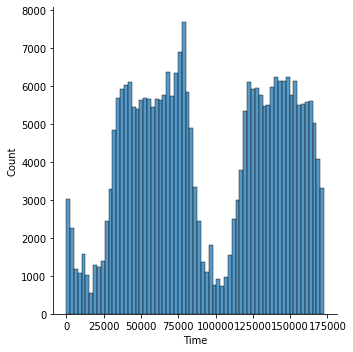

In [331]:
sns.displot(df['Time']);

Time 변수는 데이터셋의 첫 번째 거래가 발생한 시각과 해당 거래가 발생한 시각의 차이를 보여주는 변수로, 절대적인 거래 발생 시각이 아닌 상대적인 거래 발생 시각을 표현합니다. 저는 이 변수가 의미하는 바가 명확하지 않고, 유의미한 정보가 아니라고 생각하여 이상거래 탐지에는 사용하지 않았습니다.

In [332]:
df = df.drop('Time', axis=1)

## 3.3 V1 ~ V28

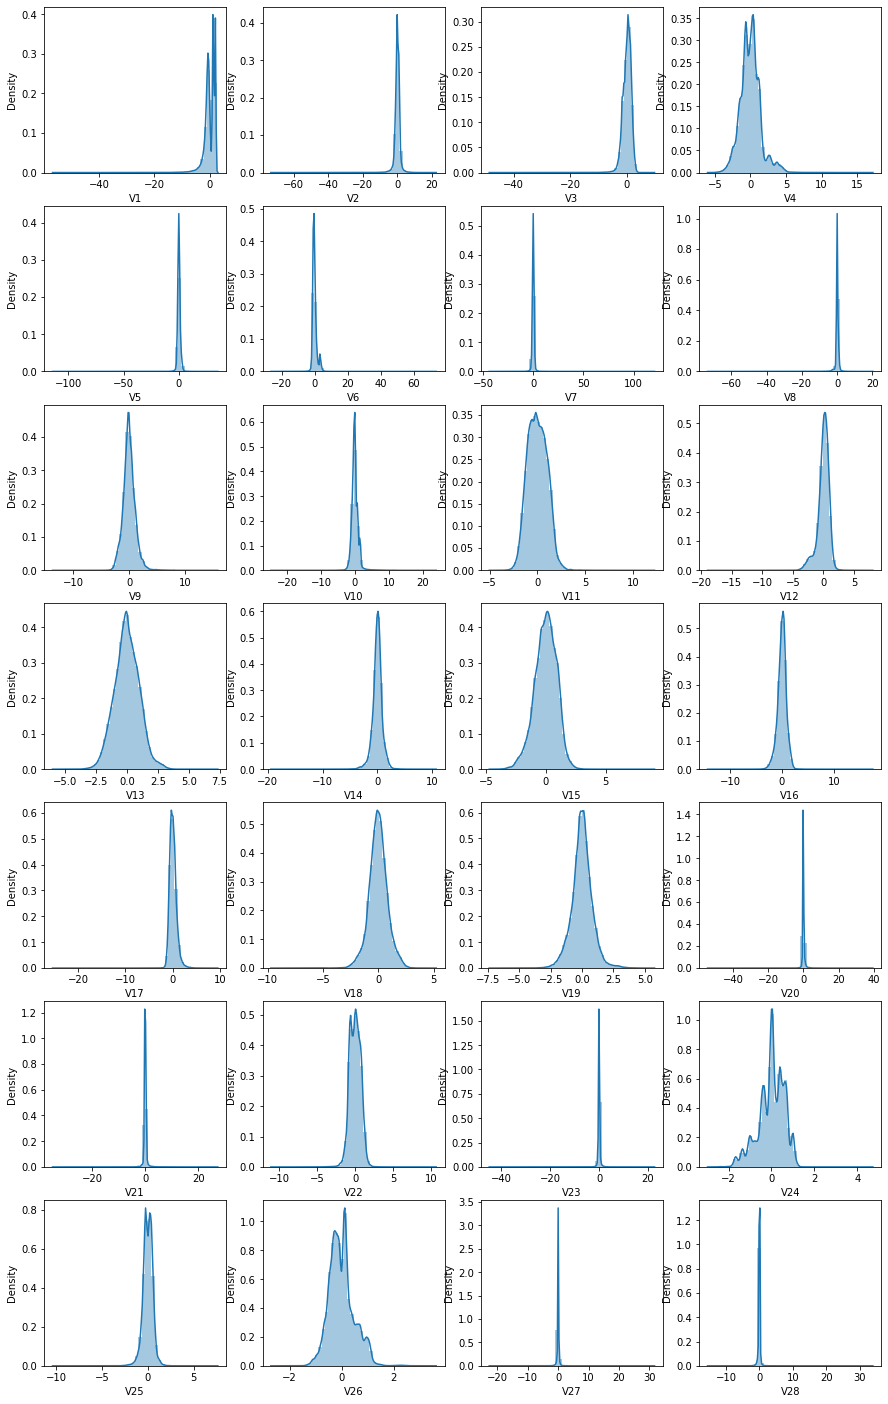

In [333]:
cols = df.loc[:, "V1":"V28"]
f, ax = plt.subplots(7, 4, figsize=(15, 25))
for i, col in enumerate(cols):
    row = i//4
    Col = i%4
    sns.distplot(df[col], ax=ax[row,Col])

## 3.4 Amount

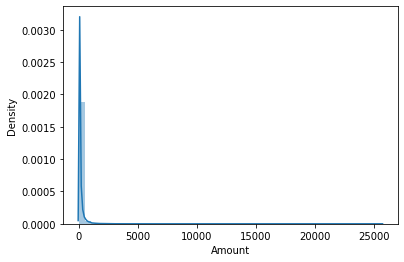

In [334]:
sns.distplot(df['Amount']);

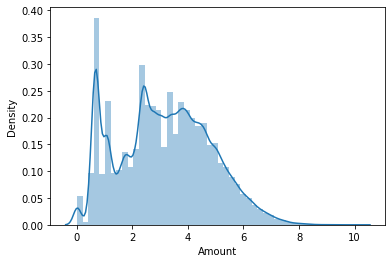

In [335]:
df['Amount'] = np.log1p(df['Amount'])
sns.distplot(df['Amount']);

분포가 왼쪽으로 치우쳐 있어 로그화를 통해 정규분포와 유사한 분포로 바꿔주었습니다.

# 4. 데이터 전처리

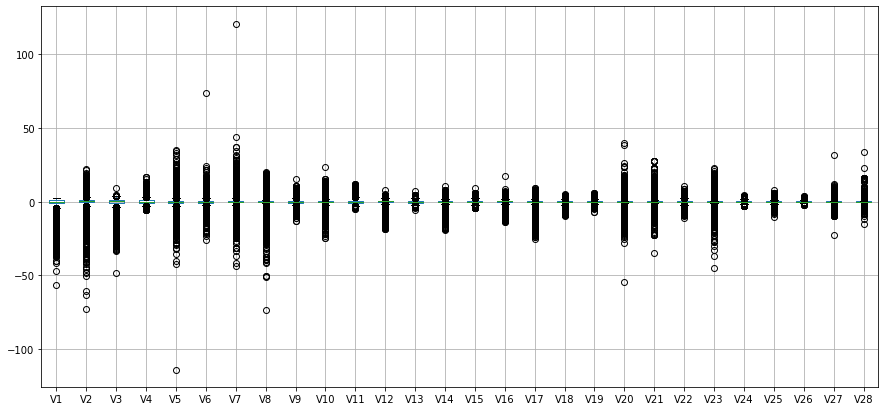

In [336]:
plt.figure(figsize=(15, 7))
df.iloc[:,0:-2].boxplot();

boxplot을 통해 불연속적으로 떨어져있는 극단치가 있는 변수를 확인할 수 있습니다.

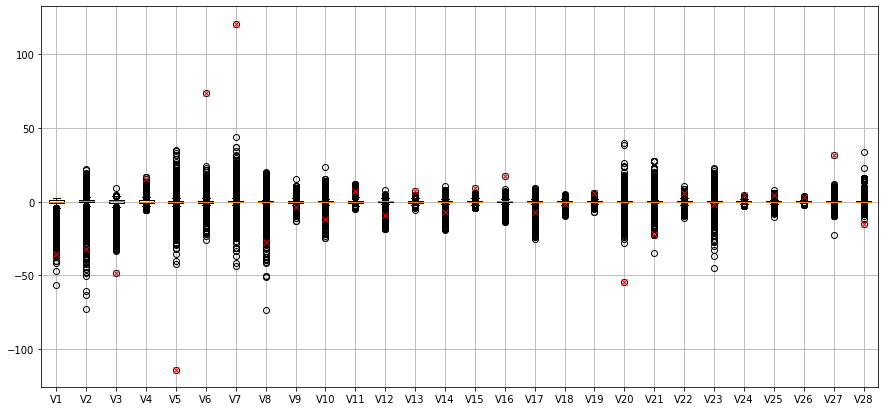

In [337]:
plt.figure(figsize=(15, 7))
plt.boxplot(df.loc[:, 'V1':'V28'])
plt.plot([None] + df.loc[274771, "V1":"V28"].tolist(), 'rx')
plt.xticks(ticks=range(1, 29), labels=df.columns[:28])
plt.grid()
plt.show()

이상치 처리를 하기 전 Index 274771의 값들이 여러 변수에서 극단치로 발견되는 것을 확인할 수 있었습니다. 이와 같은 방식으로 다른 데이터를 찾고 7개의 데이터를 제거해주었습니다.

In [338]:
df = df.drop([274771, 65423, 39769, 118764, 58465, 91896, 151296], axis=0)

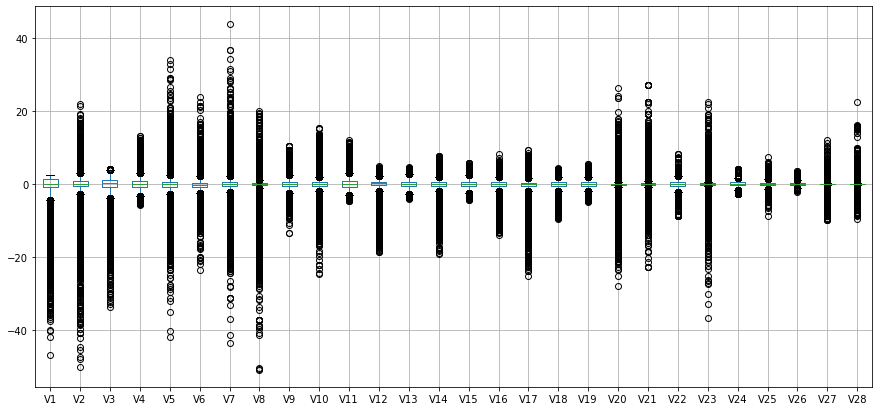

In [339]:
plt.figure(figsize=(15, 7))
df.iloc[:,0:-2].boxplot();

이상치 처리 후 분포의 모습입니다. 이외의 값들은 이상치 처리를 하지 않았습니다.

# 5. 모델 생성 및 평가

## 5.1. train test split

In [343]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

## 5.2. oversampling

In [345]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

앞서 언급한 범주불균형으로 인해 샘플링 작업이 필요합니다. 샘플링은 크게 Oversampling과 Undersampling으로 구분할 수 있습니다. 이번에는 소수 범주의 데이터가 충분하지 않기 때문에 오버샘플링을 사용하였습니다. 이때 test 데이터에는 샘플링을 하지 않아야하기 때문에, train test split을 수행한 이후 샘플링을 하는 것에 유의해야합니다.

## 5.3. 모델생성 및 성과 평가

In [352]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier()

# 학습 수행 및 예측
dt_clf.fit(X_resampled, y_resampled)
dt_pred = dt_clf.predict(X_test)

# 성과 평가
print('### 정확도 : {0:.4f}    F1-score : {1:.4f}'.format(accuracy_score(y_test, dt_pred), f1_score(y_test, dt_pred)), '\n')
print('### 정오행렬표\n', confusion_matrix(y_test, dt_pred), '\n')
print('### 분류 리포트\n', classification_report(y_test, dt_pred, target_names = ['Class 0', 'Class 1']))

### 정확도 : 0.9990    F1-score : 0.7005 

### 정오행렬표
 [[56832    30]
 [   29    69]] 

### 분류 리포트
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     56862
     Class 1       0.70      0.70      0.70        98

    accuracy                           1.00     56960
   macro avg       0.85      0.85      0.85     56960
weighted avg       1.00      1.00      1.00     56960



Decision Tree를 이용하여 이진 분류를 실시한 결과 F1-score가 0.7이 나왔습니다.